In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#The following models where each trained for 70 epochs
#the first two used the adjacency matric with weight of 0.08 and the last did not use an adjacency matrix

lat_28_cov = pd.read_csv("analysis/70_008_AdjVAE_lat28_cov.csv", index_col=0)
lat_48_cov = pd.read_csv("analysis/70_008_AdjVAE_lat48_cov.csv", index_col=0)
lat_128_cov = pd.read_csv("analysis/070_100_noAdj_VAE_cov.csv", index_col=0)

lat_28_entropies = pd.read_csv("analysis/70_008_AdjVAE_lat28_ent.csv", index_col=0).to_numpy().flatten()
lat_48_entropies = pd.read_csv("analysis/70_008_AdjVAE_lat48_ent.csv", index_col=0).to_numpy().flatten()
lat_128_entropies = pd.read_csv("analysis/070_100_noAdj_VAE_ent.csv", index_col=0).to_numpy().flatten()

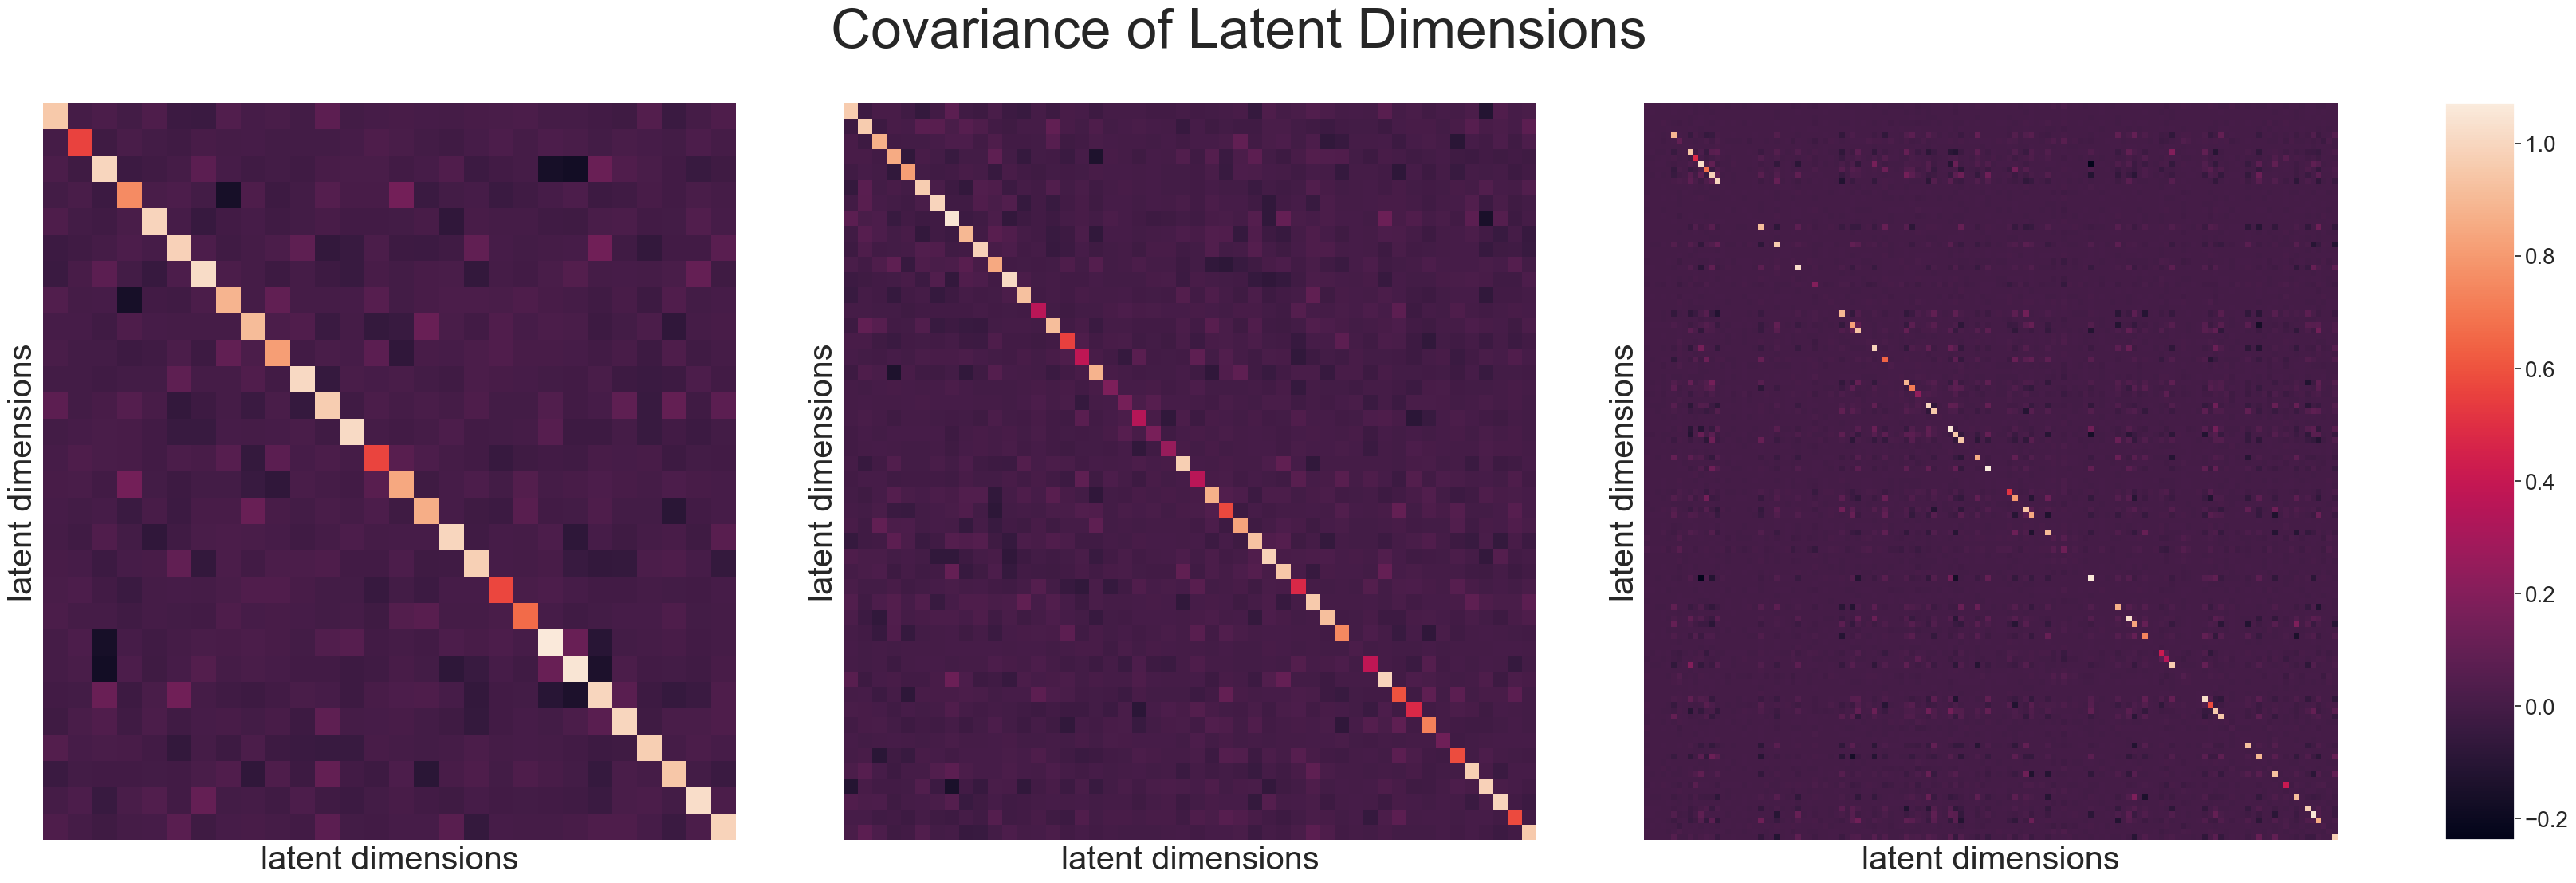

In [22]:

f, ax = plt.subplots(ncols=4, gridspec_kw=dict(width_ratios=[2,2,2,0.2]), figsize=(40, 12))

vmin = min(lat_28_cov.values.min(), lat_48_cov.values.min(), lat_128_cov.values.min())
vmax = max(lat_28_cov.values.max(), lat_48_cov.values.max(), lat_128_cov.values.max())

sns.heatmap(lat_28_cov, ax=ax[0], xticklabels=False, yticklabels=False, annot=False, cbar=False, vmin=vmin, vmax=vmax)
sns.heatmap(lat_48_cov, ax=ax[1], xticklabels=False, yticklabels=False, annot=False, cbar=False, vmin=vmin, vmax=vmax)
sns.heatmap(lat_128_cov, ax=ax[2], xticklabels=False, yticklabels=False, annot=False, cbar=False, vmin=vmin, vmax=vmax)

colorbar = f.colorbar(ax[1].collections[0], cax=ax[3])
colorbar.ax.tick_params(labelsize=20)

ax[0].set_ylabel("latent dimensions", fontsize=30)
ax[0].set_xlabel("latent dimensions", fontsize=30)

ax[1].set_ylabel("latent dimensions", fontsize=30)
ax[1].set_xlabel("latent dimensions", fontsize=30)

ax[2].set_ylabel("latent dimensions", fontsize=30)
ax[2].set_xlabel("latent dimensions", fontsize=30)

f.suptitle('Covariance of Latent Dimensions', fontsize=50)

plt.show()
f.savefig("Paper Figures/LatDimCovariance.pdf") 

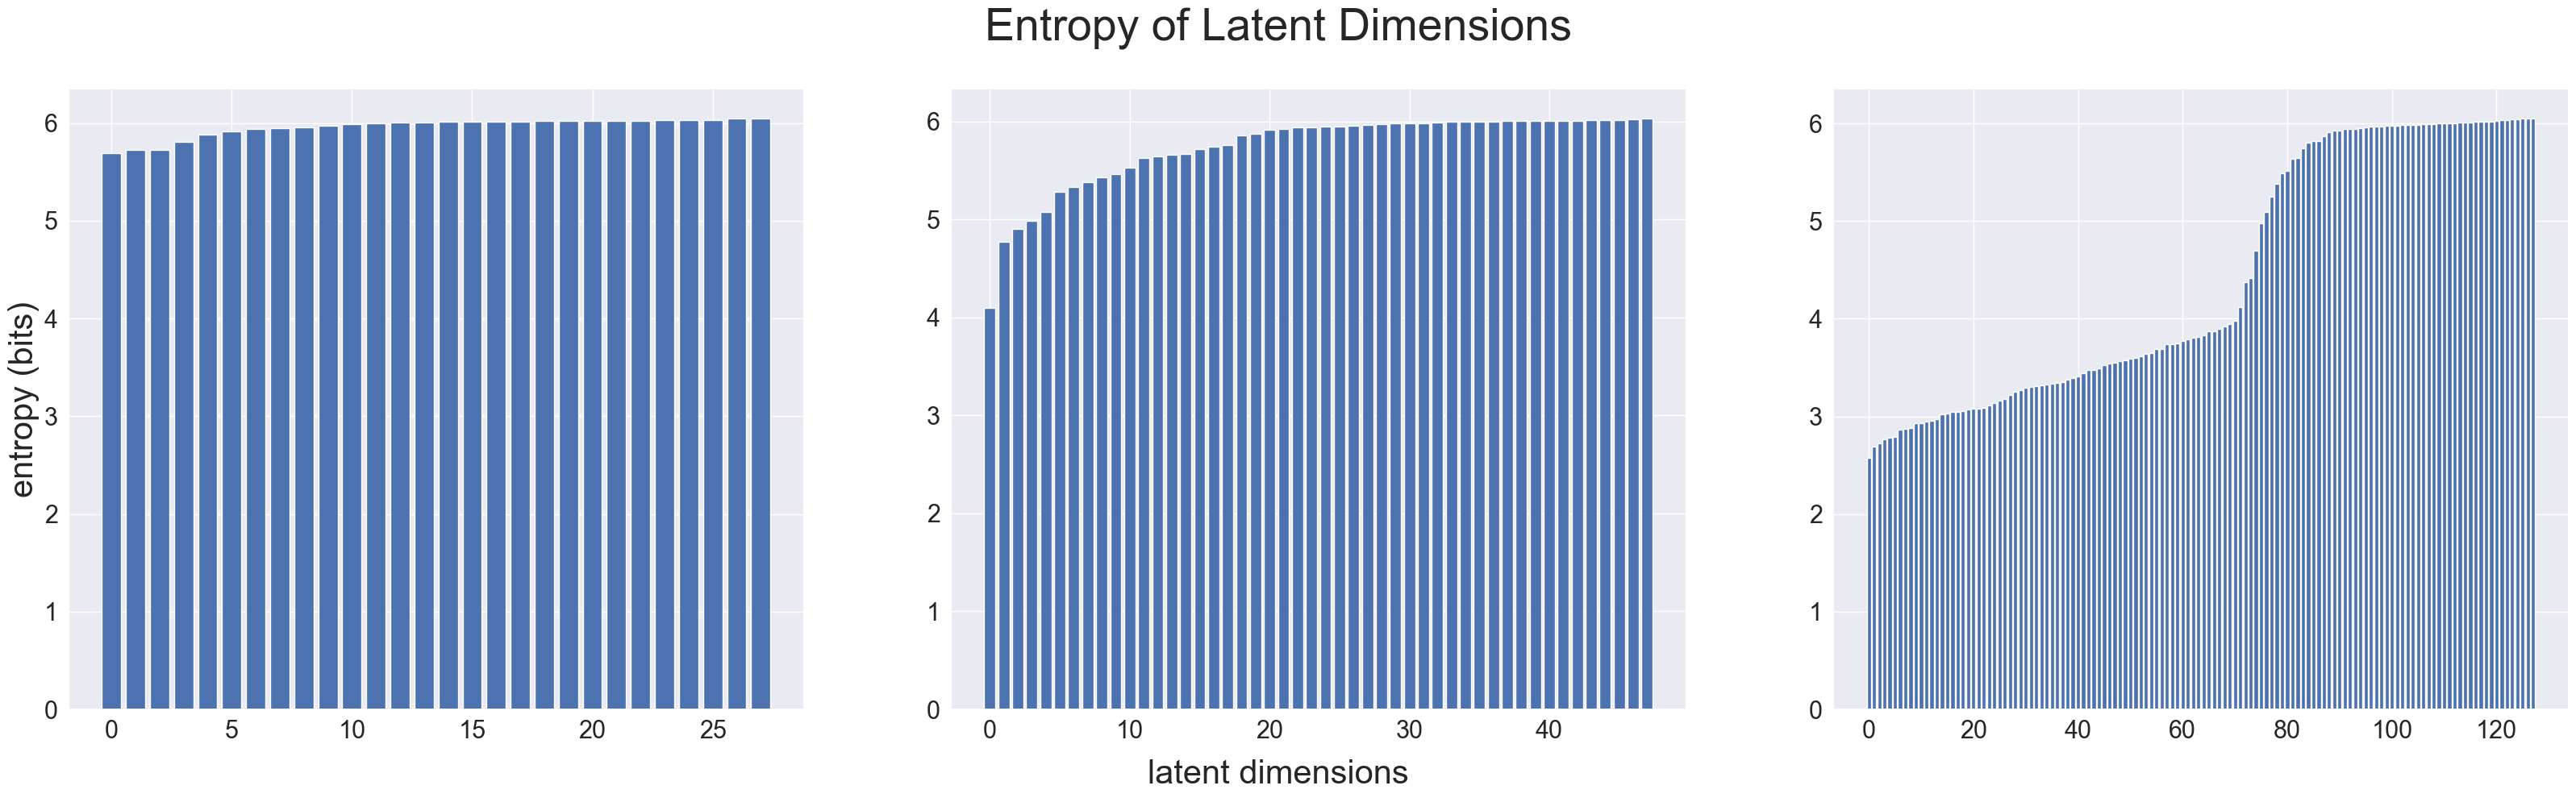

In [24]:

f, ax = plt.subplots(1, 3, figsize=(40,10))

sns.set(font_scale=2)

ax[0].bar(range(len(lat_28_entropies)), lat_28_entropies)
ax[1].bar(range(len(lat_48_entropies)), lat_48_entropies)
ax[2].bar(range(len(lat_128_entropies)), lat_128_entropies)

#f.xlabel('Latent Dimension')
#f.ylabel('Entropy (bits)')

f.suptitle('Entropy of Latent Dimensions', fontsize=40)


f.supxlabel('latent dimensions', fontsize=30)
ax[0].set_ylabel("entropy (bits)", fontsize=30)

plt.show()
f.savefig("Paper Figures/LatDimEntropy") 

In [3]:
import pickle
import numpy as np
d = {}
with open("data/moses_char_dict.pkl", 'rb') as f:
        d = pickle.load(f)
f.close()
print(d)
print(len(d))

d = {}
with open("data/moses_new_dict.pkl", 'rb') as f:
        d = pickle.load(f)
f.close()
print(d)
print(len(d))



w = np.load("data/moses_new_weights.npy")
print(len(w))

{'<start>': 0, '[C]': 1, '[S]': 2, '[=Branch1]': 3, '[=O]': 4, '[=C]': 5, '[NH1]': 6, '[Branch2]': 7, '[=N]': 8, '[O]': 9, '[Ring1]': 10, '[#Branch2]': 11, '[Branch1]': 12, '[Cl]': 13, '[#Branch1]': 14, '[N]': 15, '[Ring2]': 16, '[=Branch2]': 17, '[#C]': 18, '[F]': 19, '[#N]': 20, '[P]': 21, '[Br]': 22, '[=S]': 23, '_': 24, '<end>': 25}
26
{'<start>': 0, '[C]': 1, '[S]': 2, '[=Branch1]': 3, '[=O]': 4, '[=C]': 5, '[N]': 6, '[Branch2]': 7, '[=N]': 8, '[O]': 9, '[Ring1]': 10, '[#Branch2]': 11, '[Branch1]': 12, '[Cl]': 13, '[#Branch1]': 14, '[Ring2]': 15, '[=Branch2]': 16, '[#C]': 17, '[F]': 18, '[#N]': 19, '[P]': 20, '[Br]': 21, '[=S]': 22, '_': 23, '<end>': 24}
25
24


In [15]:
d = {}
with open("data/no_hex_dict.pkl", 'rb') as f:
        d = pickle.load(f)
f.close()
print(d)
print(len(d))
print(d["[NH1]"])



w = np.load("data/no_hex_weights_new.npy")
print(len(w))

{'<start>': 0, '[C]': 1, '[S]': 2, '[=Branch1]': 3, '[0]': 4, '[=O]': 5, '[=C]': 6, '[NH1]': 7, '[6]': 8, '[=N]': 9, '[O]': 10, '[Ring1]': 11, '[8]': 12, '[12]': 13, '[Branch1]': 14, '[11]': 15, '[Cl]': 16, '[5]': 17, '[N]': 18, '[3]': 19, '[4]': 20, '[14]': 21, '[Ring2]': 22, '[17]': 23, '[19]': 24, '[7]': 25, '[1]': 26, '[2]': 27, '[Branch2]': 28, '[16]': 29, '[13]': 30, '[9]': 31, '[18]': 32, '[F]': 33, '[22]': 34, '[#N]': 35, '[15]': 36, '[Br]': 37, '[10]': 38, '[#C]': 39, '[20]': 40, '[21]': 41, '[24]': 42, '[27]': 43, '[25]': 44, '[23]': 45, '[=Branch2]': 46, '[32]': 47, '[28]': 48, '[=S]': 49, '[26]': 50, '[29]': 51, '[30]': 52, '[31]': 53, '[33]': 54, '[35]': 55, '[34]': 56, '[#Branch1]': 57, '[36]': 58, '[#Branch2]': 59, '[37]': 60, '[38]': 61, '[39]': 62, '_': 63, '<end>': 64}
65
7
64


In [24]:
d = {}
with open("data/no_overload_dict.pkl", 'rb') as f:
        d = pickle.load(f)
f.close()
print(d)
print(len(d))
print(d["[0]"])



w = np.load("data/no_overload_weights.npy")
print(len(w))

{'<start>': 0, '[C]': 1, '[S]': 2, '[=Branch1]': 3, '[0]': 4, '[=O]': 5, '[=C]': 6, '[NH1]': 7, '[6]': 8, '[=N]': 9, '[O]': 10, '[Ring1]': 11, '[8]': 12, '[12]': 13, '[Branch1]': 14, '[11]': 15, '[Cl]': 16, '[5]': 17, '[N]': 18, '[3]': 19, '[4]': 20, '[14]': 21, '[Ring2]': 22, '[1]': 23, '[7]': 24, '[2]': 25, '[Branch2]': 26, '[13]': 27, '[9]': 28, '[F]': 29, '[#N]': 30, '[15]': 31, '[Br]': 32, '[10]': 33, '[#C]': 34, '[=Branch2]': 35, '[=S]': 36, '[#Branch1]': 37, '[#Branch2]': 38, '_': 39, '<end>': 40}
41
4
40
